A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [5]:
data = pd.read_csv('Company_Data.csv')

In [6]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
data['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [8]:
d = []

In [9]:
for i in data['Sales']:
  if i<=6 :
    d.append(0)
  elif i>6 and i<=11:
    d.append(1)
  else:
    d.append(2)


In [10]:
d

[1,
 2,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 0,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,


In [11]:
data['Sales'] = d

In [12]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,1,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No


In [13]:
x=data.iloc[:,1:11]
y=data['Sales']

In [14]:
x = pd.get_dummies(x)

In [15]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [16]:
y

0      1
1      2
2      1
3      1
4      0
      ..
395    2
396    1
397    1
398    0
399    1
Name: Sales, Length: 400, dtype: int64

In [17]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

Building Decision Tree Classifier using Gini Criteria

In [18]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth=4,min_samples_split=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

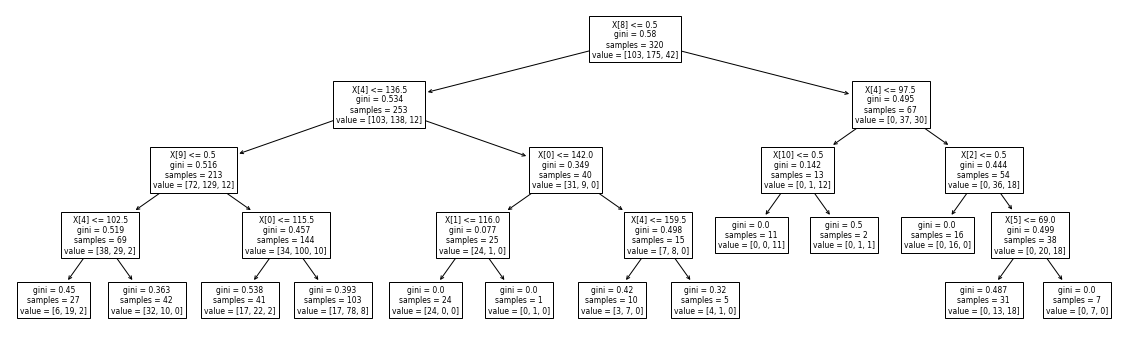

In [19]:
#PLot the decision tree
plt.figure(figsize=(20,6))
tree.plot_tree(model);
plt.show()

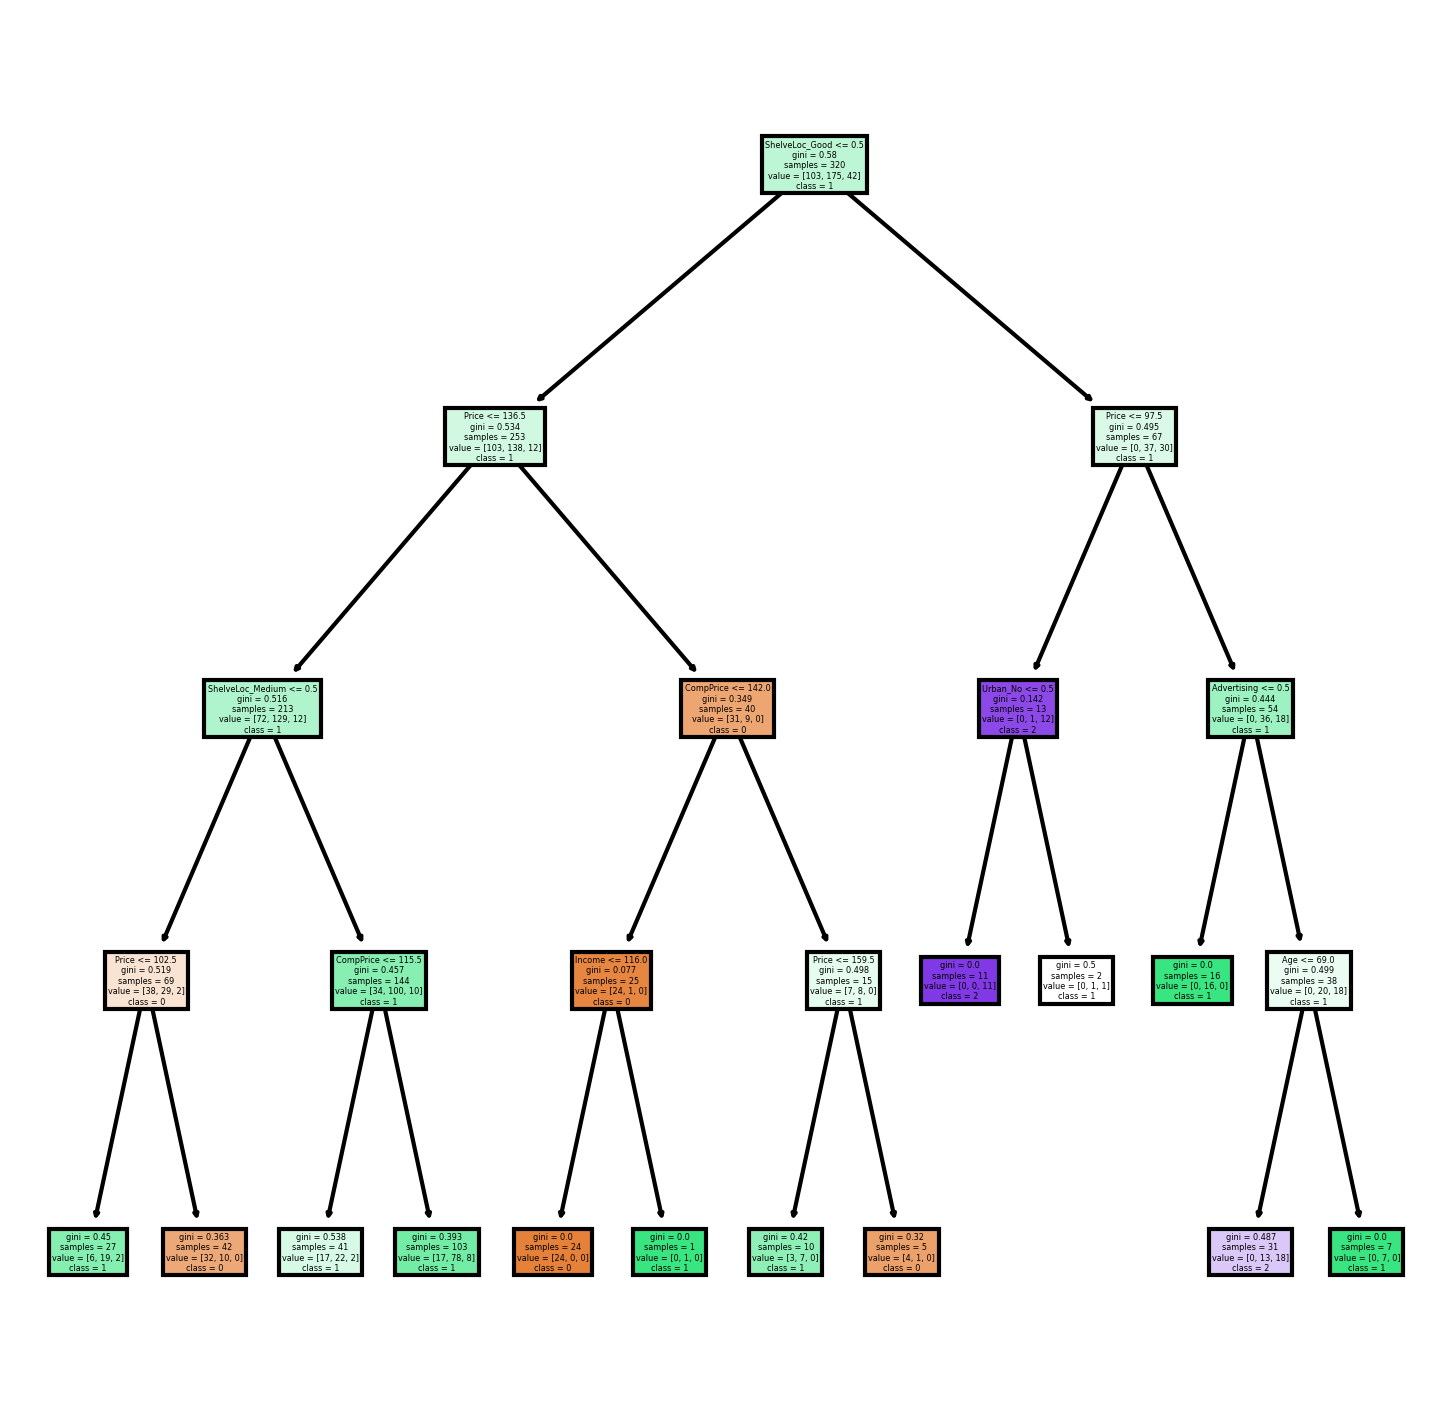

In [20]:
fn=['CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No','US_Yes']
cn=['0', '1', '2']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [21]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    53
0    16
2    11
dtype: int64

In [22]:
from sklearn import metrics
metrics.accuracy_score(preds,y_test)

0.6375

In [23]:
feature_imp = model.feature_importances_
feature_imp

array([0.10628192, 0.02601816, 0.06846885, 0.        , 0.39041918,
       0.05217989, 0.        , 0.        , 0.23405   , 0.11111565,
       0.01146634, 0.        , 0.        , 0.        ])

In [24]:
imp_df = pd.DataFrame(feature_imp,columns=['importance'])
imp_df['features'] = x.columns
imp_df

,importance,features
0,0.106282,CompPrice
1,0.026018,Income
2,0.068469,Advertising
3,0.000000,Population
4,0.390419,Price
5,0.052180,Age
6,0.000000,Education
7,0.000000,ShelveLoc_Bad
8,0.234050,ShelveLoc_Good
9,0.111116,ShelveLoc_Medium


<BarContainer object of 14 artists>

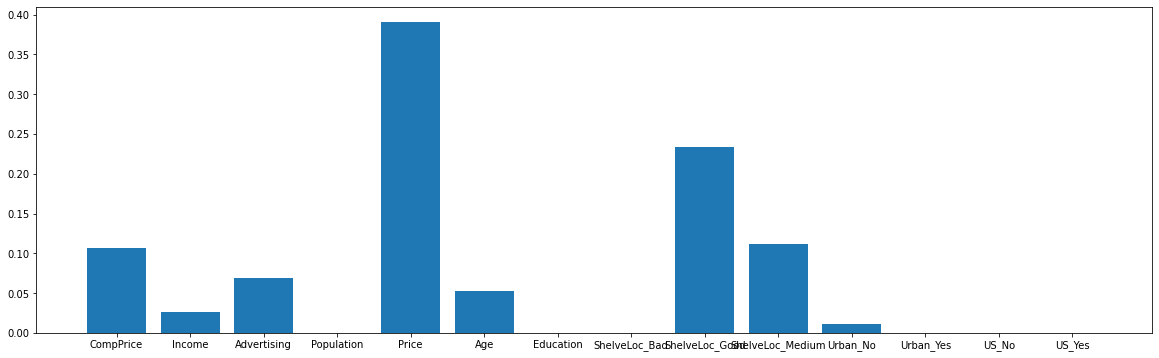

In [25]:
plt.figure(figsize=(20,6))
plt.bar(imp_df['features'],imp_df['importance'])

**We can see that price and shelveloc are the factors which are affecting the sales much with highest imp**

Building Decision Tree Classifier (CART) using Entropy Criteria

In [26]:
from sklearn.tree import DecisionTreeClassifier
model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3,)

In [27]:
model_entropy.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
#Prediction and computing the accuracy
preds=model_entropy.predict(x_test)
metrics.accuracy_score(preds,y_test)

0.625

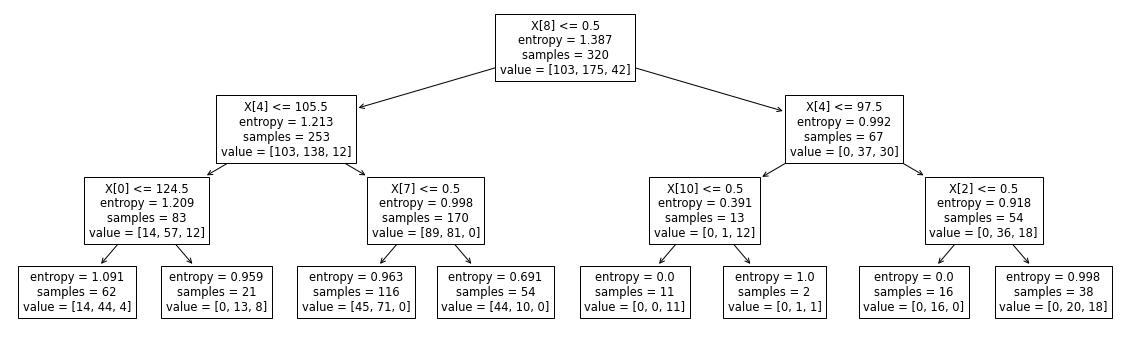

In [29]:
#PLot the decision tree
plt.figure(figsize=(20,6))
tree.plot_tree(model_entropy);
plt.show()

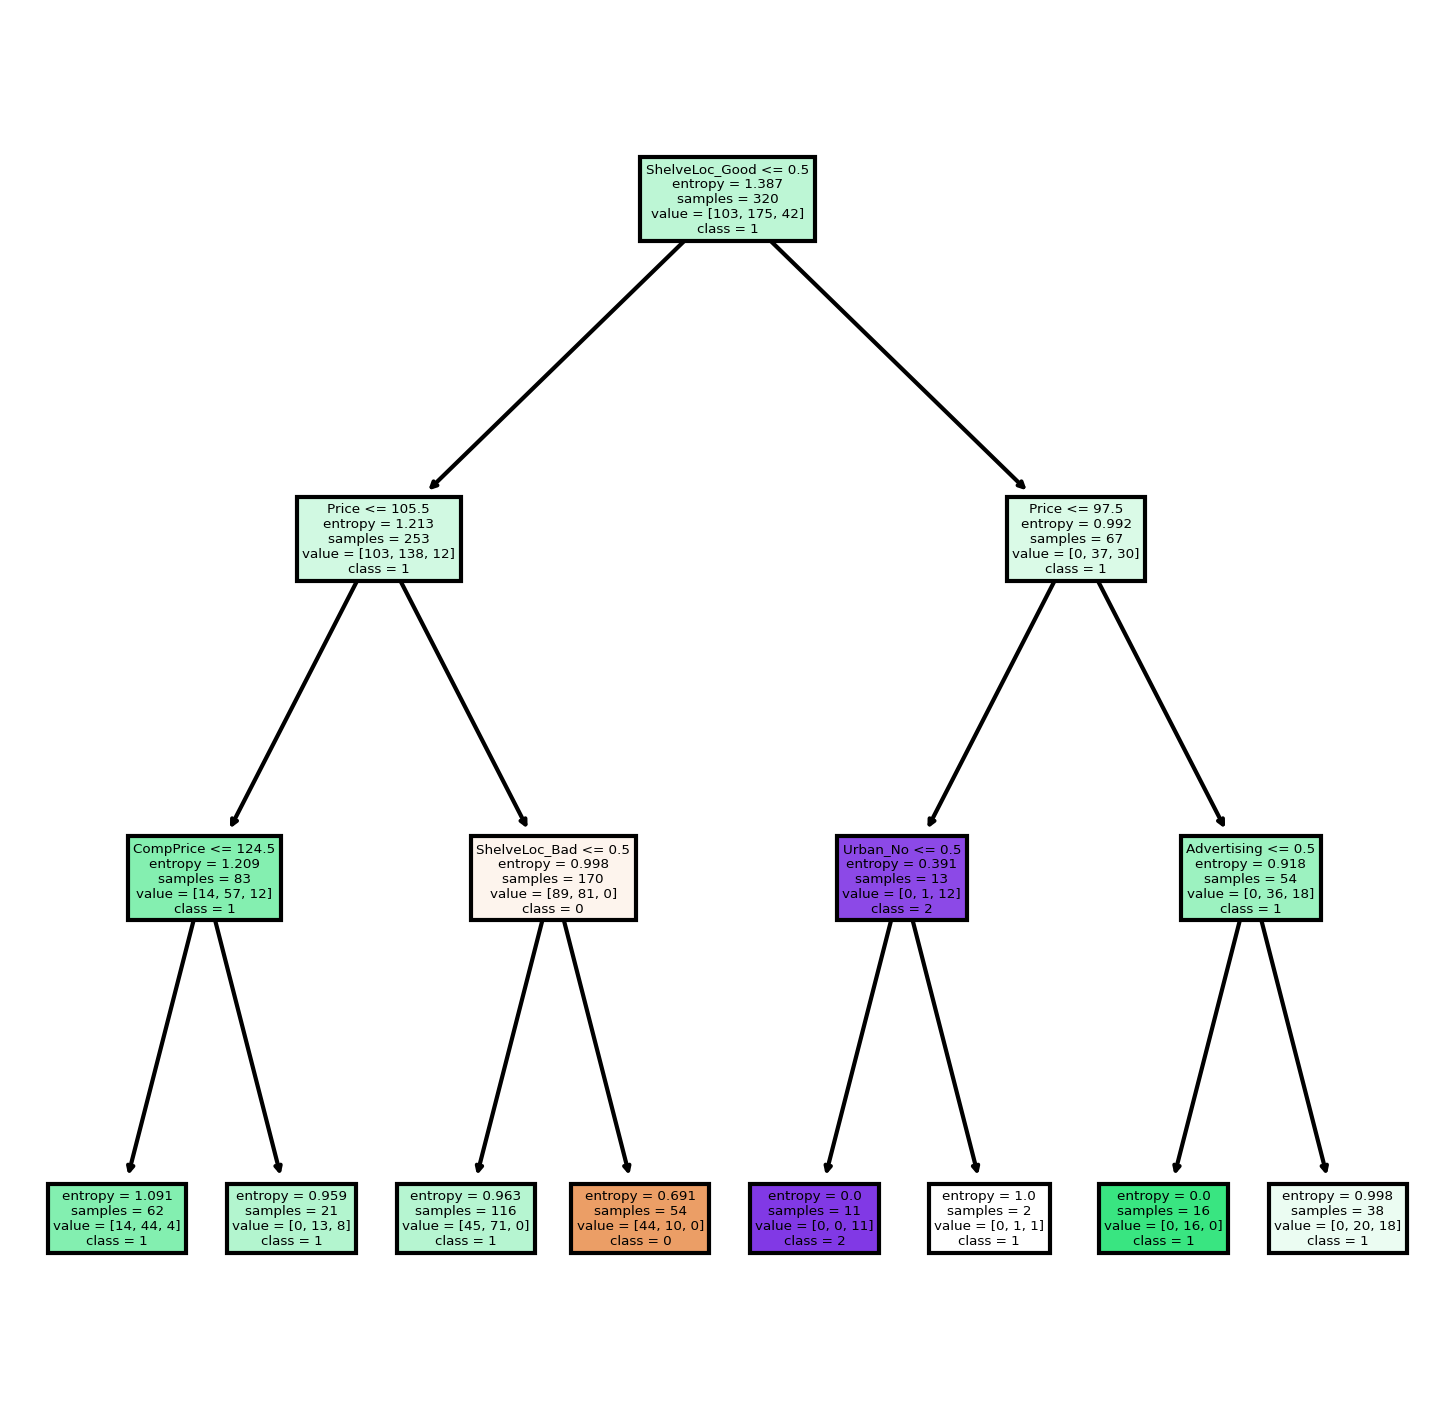

In [30]:
fn1=['CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No','US_Yes']
cn1=['0', '1', '2']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)
tree.plot_tree(model_entropy,
               feature_names = fn1, 
               class_names=cn1,
               filled = True);